# Vision par ordinateur - TP1 

## 3. Détection de peau

### 3.2. Construction d'une base d'exemples peau - non-peau

On crée une base d'images, dont voici un extrait.

In [1]:
import cv2
import numpy as np

import os

from IPython.display import Image, display

import matplotlib.pyplot as plt
%matplotlib inline


def get_images(directory):
    result = []
    for f in os.listdir(directory):
        if f.endswith(".jpg") or f.endswith(".png"):
            result.append(directory + "/" + f)

    return result

display(Image("skin/01.png"))
display(Image("skin/10.png"))
display(Image("notskin/20.png"))
display(Image("notskin/03.png"))

ImportError: No module named matplotlib.pyplot

## 3.3 - Une méthode simple

On construit une fonction d'après [Vezhnevets et al] pour classifier un pixel

In [23]:
def img_skin_naive(img):
    """
    Use simple classifier to detect skin
    """
    skin_ratio = 0
    height, width, depth = img.shape

    for col in img:
        for pixel in col:
            skin_ratio += 1 if is_skin_naive(pixel) else 0

    skin_ratio /= float(height * width)

    return skin_ratio


def is_skin_naive(pixel):
    """
    Simple classifier: return true if the pixel verifies a set of color constraints
    """
    b, g, r = pixel

    return (
        r > 95
        and g > 40
        and b > 20
        and max([r, g, b]) - min([r, g, b]) > 15
        and abs(int(r) - int(g)) > 15
        and r > g
        and r > b
    )

On l'applique sur notre base de donnée d'images

In [28]:
print "Skin " + "=" * 70

black = "\x1b[0m"
    
for i in get_images("skin"):
    img = cv2.imread(i)
    result = img_skin_naive(img) * 100
    color = "\x1b[31m" if result < 80 else "\x1b[32m"
    print color + "{} \t\t {:.02f}%".format(i, result) + black

print "\nNot Skin " + "=" * 70

for i in get_images("notskin"):
    img = cv2.imread(i)
    result = img_skin_naive(img) * 100
    color = "\x1b[32m" if result < 20 else "\x1b[31m"
    print color + "{} \t\t {:0.2f}%".format(i, result) + black


Skin ======================================================================
skin/00.png 		 99.25%
skin/01.png 		 99.19%
skin/02.png 		 97.94%
skin/03.png 		 93.11%
skin/04.png 		 73.54%
skin/05.png 		 93.50%
skin/06.png 		 79.76%
skin/07.png 		 25.61%
skin/08.png 		 57.38%
skin/09.png 		 100.00%
skin/10.png 		 100.00%
skin/11.png 		 100.00%
skin/12.png 		 93.93%
skin/13.png 		 85.73%
skin/14.png 		 100.00%
skin/15.png 		 99.86%
skin/16.png 		 99.52%
skin/17.png 		 0.00%
skin/18.png 		 0.00%
skin/19.png 		 100.00%
skin/20.png 		 76.33%
skin/21.png 		 31.44%
skin/22.png 		 100.00%
skin/23.png 		 99.85%
skin/24.png 		 100.00%
skin/25.png 		 80.37%
skin/26.png 		 0.00%
skin/27.png 		 100.00%
skin/28.png 		 99.88%
skin/29.png 		 92.48%
skin/30.png 		 100.00%
skin/31.png 		 100.00%
skin/32.png 		 100.00%
skin/33.png 		 16.27%
skin/34.png 		 100.00%
skin/35.png 		 100.00%
skin/36.png 		 86.71%
skin/37.png 		 99.13%
skin/38.png 		 91.41%
skin/39.png 		 95.13%
skin/40.png 		 100.00%
skin/41.png

On voit que la méthode n'est pas très précise, avec un certain nombre d'images de peau comptabilisée comme 0% de peau et inversement.

### 3.5. Conversion d'espaces couleurs

On utilise les fonctions `cvtColor` et `calcHist` d'OpenCV pour réaliser des histogrammes de peau dans différents espaces couleurs.

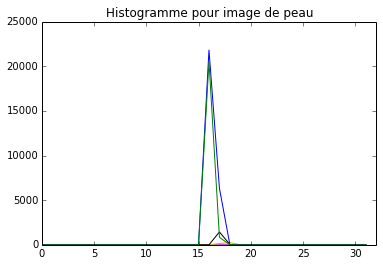

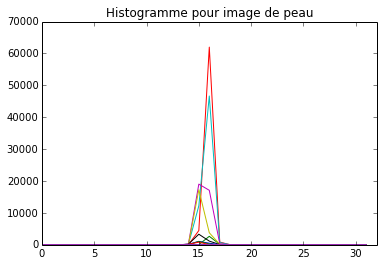

In [37]:
def getHistogram(directory):
    imgs = [cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2LAB) for img in get_images(directory)]
    return cv2.calcHist(imgs, [1,2], None, [32, 32], [0, 256, 0, 256])

def drawHistogram(hist, title):
    plt.plot(hist)
    plt.xlim([0,32])
    plt.title(title)
    plt.show()

drawHistogram(getHistogram("skin"), "Histogramme pour image de peau")
drawHistogram(getHistogram("notskin"), "Histogramme pour image de peau")

In [62]:
hist = getHistogram("notskin")
hist[18][20]


0.0

### 3.6 Détection de la peau dans les images